In [1]:
# %cd ..
import inputs, simuls, analysis
results = analysis.GetResults(verbose=True)

# PenEasy SPC simulation

In [ ]:
pid = 'SPC'
# Initialize PenEasy Input Editor
peneasy_inps = inputs.PenEasy(verbose=True)

# Initialize Simulators (identified by pid)
peneasy_sims = simuls.PenEasy(verbose=True)
peneasy_sims.activate_pid('SPC')

In [ ]:
MATS = {'water' : ['water', 1, 1.00+00]}
SIZE = [10, 10, 10]
STEP = [0.4, 0.4, 0.4]  #cm
nhist = "1e6"

peneasy_inps.edit_voxSize(pid, SIZE, STEP)
peneasy_inps.edit_seed(pid, 12345, 54321)
peneasy_inps.edit_mat(pid, MATS, SIZE, STEP)
peneasy_inps.edit_source_nhist(pid, nhist)

In [ ]:
isotopes = ["N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] #"C11", 

peneasy_inps.verbose = False
for iso in isotopes:
    print(f"Simulating {iso}")
    peneasy_inps.edit_isotope(pid, iso)
    peneasy_sims.simulate(pid, get_times=True, time_samples=1, output_dir="RESULTS/SPC-Study1-Water/PenEasy_xyz", final_file=f"{iso}")

# Results analysis

In [11]:
import matplotlib.pyplot as plt
import numpy as np

histo_bins = 201
histo_step = .01 #cm
isotopes = ["C11", "N13", "O15", "F18", "Cu64", "Ga68", "Rb82", "I124"] 

lowPRisotopes = ["C11", "N13", "Cu64", "F18"]
highPRisotopes = ["O15", "Ga68", "Rb82", "I124"]
lowPRlabels = {iso:[] for iso in lowPRisotopes}
highPRlabels = {iso:[] for iso in highPRisotopes}

results.active_results.clear()
for iso in isotopes:
    of = f"RESULTS/SPC-Study1-Water/PHITS_xyz/{iso}.dat"
    results.load(f"PHITS {iso}", of, [histo_bins]*3, [histo_step]*3)

    of = f"RESULTS/SPC-Study1-Water/PenEasy_xyz/{iso}.dat"
    results.load(f"PenEasy {iso}", of, [histo_bins]*3, [histo_step]*3)

    if iso in lowPRlabels:
        lowPRlabels[iso].append(f"PHITS {iso}")
        lowPRlabels[iso].append(f"PenEasy {iso}")
    elif iso in highPRlabels:
        highPRlabels[iso].append(f"PHITS {iso}")
        highPRlabels[iso].append(f"PenEasy {iso}")

for iso in ["C11", "O15", "F18"]:
    of = f"RESULTS/SPC-Study1-Water/GATE7_xyz/{iso}.dat"
    results.load(f"GATE7 {iso}", of, [histo_bins]*3, [histo_step]*3)

    if iso in lowPRlabels:
        lowPRlabels[iso].append(f"GATE7 {iso}")
    elif iso in highPRlabels:
        highPRlabels[iso].append(f"GATE7 {iso}")

lowPRlabels_all = [label for iso in lowPRisotopes for label in lowPRlabels[iso]]
highPRlabels_all = [label for iso in highPRisotopes for label in highPRlabels[iso]]

PHITS C11 loaded
PenEasy C11 loaded
PHITS N13 loaded
PenEasy N13 loaded
PHITS O15 loaded
PenEasy O15 loaded
PHITS F18 loaded
PenEasy F18 loaded
PHITS Cu64 loaded
PenEasy Cu64 loaded
PHITS Ga68 loaded
PenEasy Ga68 loaded
PHITS Rb82 loaded
PenEasy Rb82 loaded
PHITS I124 loaded
PenEasy I124 loaded
GATE7 C11 loaded
GATE7 O15 loaded
GATE7 F18 loaded


In [12]:
results.data_analysis()

Size of annihilations sample:
     PHITS C11           988366
     PenEasy C11        1009899
     PHITS N13           984131
     PenEasy N13        1009899
     PHITS O15           974422
     PenEasy O15        1009899
     PHITS F18          1000000
     PenEasy F18        1009899
     PHITS Cu64         1000000
     PenEasy Cu64       1009899
     PHITS Ga68         1000000
     PenEasy Ga68       1009899
     PHITS Rb82          999309
     PenEasy Rb82       1009899
     PHITS I124         1000000
     PenEasy I124       1009899
     GATE7 C11          1000076
     GATE7 O15          1000058
     GATE7 F18          1000058
Number of annihilation point coords:
     PHITS C11           988366
     PenEasy C11        1009899
     PHITS N13           984131
     PenEasy N13        1009899
     PHITS O15           974422
     PenEasy O15        1009899
     PHITS F18          1000000
     PenEasy F18        1009899
     PHITS Cu64         1000000
     PenEasy Cu64       1009899
     

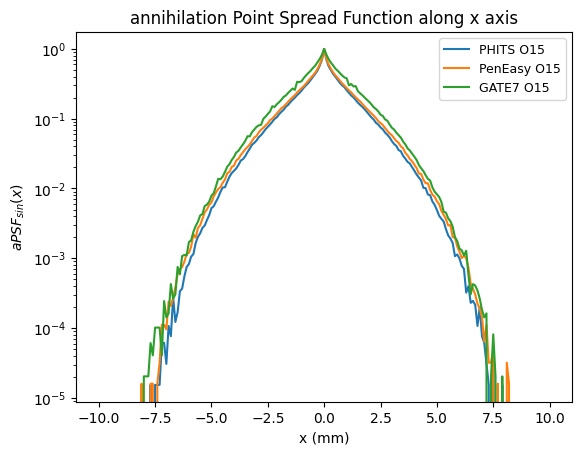

In [19]:
results.plot_aPSFx(sin=True, log_scale=True, labels=highPRlabels["O15"])

In [ ]:
results.plot_aPSFx(sin=True, log_scale=True, lim=6, labels=lowPRlabels_all, legend_size=8)
plt.show()
results.plot_aPSFx(sin=True, log_scale=True, lim=10, labels=highPRlabels_all, legend_size=8)
plt.show()

In [ ]:
results.plot_aPSF3D(sin=True, log_scale=True, labels=lowPRlabels_all, legend_size=8)
plt.show()
results.plot_aPSF3D(sin=True, log_scale=True, labels=highPRlabels_all, legend_size=8)
plt.show()


In [ ]:
results.plot_g3D(log_scale=False, labels=lowPRlabels_all)

In [ ]:
results.plot_G3D(labels=lowPRlabels_all)